# Test for Model Building

## 1 Creat a random price line based on Brownian motion

In [3]:
#ln(S(y+t)/S(y))~N(mu,sigma) 几何布朗运动


import matplotlib.pyplot as plt
import numpy as np

def Price(f=0.02,u=0,t=200):
    v = f*np.random.randn(t)+u
    P=[1]
    for i in range (t):
        P.append(P[i]*np.exp(v[i]))
    plt.plot(P)
    plt.show()
    return P

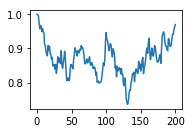

In [4]:
import matplotlib.pyplot as plt
#随机价格变化曲线
plt.subplot(2,2,1)
Price()

#价格上升通道曲线
#plt.subplot(2,2,2)
#Price(u=0.01)

#价格下降通道曲线
#plt.subplot(2,2,3)
#Price(u=-0.01)

plt.show()

## 2 HMM

### 2.1 Find up-zone and down-zone

In [41]:
def Find_zone(t=500,hl=15):
    P = Price(t=t)
    Z = []
    for i in range (hl):
        Z.append(-1)

    for i in range (t-2*hl):
        if P[i+2*hl] >= P[i]:
            Z.append(0)
        else:
            Z.append(1)

    for i in range (hl,t-hl):
        if Z[i] == 0:
            plt.plot([i],[P[i]],'ro')
        elif Z[i] == 1:
            plt.plot([i],[P[i]],'go')
    plt.show()
    return P,Z

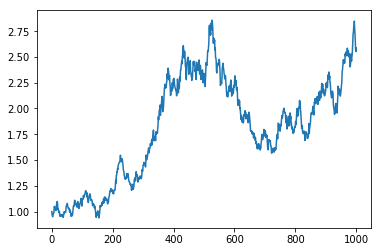

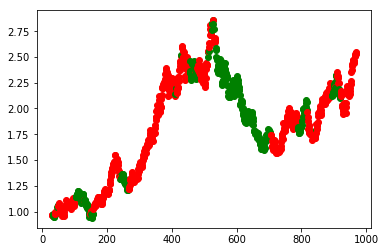

In [42]:
P,Z = Find_zone(t=1000,hl=30)

### 2.2 Count Parameters

In [ ]:
# CM:    U    D        PM:   +    -
#     U  P1   P3          U  P1   P3
#     D  P2   P4          D  P2   P4

In [46]:
def f(x):
    if x >= 0:
        return 0
    else :
        return 1
def Count_Para(t=1000,hl=15):
    P,Z = Find_zone(t=t,hl=hl)
    CM = [[0,0],
          [0,0]]#转换矩阵
    PM = [[0,0],
          [0,0]]#概率矩阵

    for i in range (hl,t-hl-1):
        PM[Z[i]][f(P[i+1]-P[i])]+=1
        CM[Z[i]][Z[i+1]]+=1
        
    return PM,CM

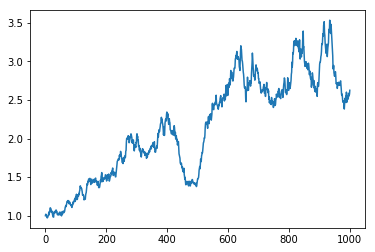

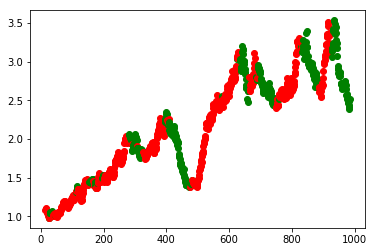

([[350, 254], [155, 210]], [[574, 30], [29, 336]])

In [47]:
Count_Para()